In [188]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import defaultdict
import os
from tqdm import tqdm
from scipy.stats import entropy
%matplotlib inline

# Look at the predicted languages from multilingual models at line level

In [189]:
df_tokenf1_mult_list = []
for file in os.listdir("../datasets/inversion_language_confusion/inversion_results/"):
    if file.startswith("multilingual_eval_token_set_f1_") and file.endswith(".csv"):
        step= file.replace("multilingual_eval_token_set_f1_", "").replace(".csv","").replace("_inverter","").replace("_corrector","")
        step2name = {"base":"Base", "step1":"Step1", "step50_sbeam8":"Step50+sbeam8"}
        print(file)
        df_ = pd.read_csv(os.path.join("../datasets/inversion_language_confusion/inversion_results/", file))
        df_["step"] = step2name[step]
        
        df_tokenf1_mult_list.append(df_)

multilingual_eval_token_set_f1_base_inverter.csv
multilingual_eval_token_set_f1_step1_corrector.csv
multilingual_eval_token_set_f1_step50_sbeam8_corrector.csv


In [190]:
df_tokenf1_mult=pd.concat(df_tokenf1_mult_list)

In [191]:
df_tokenf1_mult.rename(columns={"Unnamed: 0":"model"}, inplace=True)

In [192]:
set(df_tokenf1_mult["step"].tolist())

{'Base', 'Step1', 'Step50+sbeam8'}

In [193]:
def replace_string(x):
    return x.replace("mt5_","").replace("_32_2layers_inverter","").replace("_32_2layers_corrector", "")

In [194]:
df_tokenf1_mult["model_name"]=df_tokenf1_mult["model"].apply(replace_string)

In [195]:
df_tokenf1_mult["model_name"]= df_tokenf1_mult["model_name"].replace({"me5_ara-script":'me5_arab-script'})

# bleu score

In [196]:
df_bleu_mult_list = []
for file in os.listdir("../datasets/inversion_language_confusion/inversion_results/"):
    if file.startswith("multilingual_eval_bleu_score") and file.endswith(".csv"):
        step= file.replace("multilingual_eval_bleu_score_", "").replace(".csv","").replace("_inverter","").replace("_corrector","")
        step2name = {"base":"Base", "step1":"Step1", "step50_sbeam8":"Step50+sbeam8"}
        print(file)
        df_ = pd.read_csv(os.path.join("../datasets/inversion_language_confusion/inversion_results/", file))
        df_["step"] = step2name[step]
        
        df_bleu_mult_list.append(df_)

multilingual_eval_bleu_score_step50_sbeam8_corrector.csv
multilingual_eval_bleu_score_step1_corrector.csv
multilingual_eval_bleu_score_base_inverter.csv


In [197]:
df_bleu_mult=pd.concat(df_bleu_mult_list, axis=0)

In [198]:
df_bleu_mult.rename(columns={"Unnamed: 0":"model"}, inplace=True)

In [199]:
set(df_bleu_mult["step"].tolist())

{'Base', 'Step1', 'Step50+sbeam8'}

In [200]:
def replace_string(x):
    return x.replace("mt5_","").replace("_32_2layers_inverter","").replace("_32_2layers_corrector", "")

In [201]:
df_bleu_mult["model_name"]=df_bleu_mult["model"].apply(replace_string)

In [202]:
df_bleu_mult["model_name"]= df_bleu_mult["model_name"].replace({"me5_ara-script":'me5_arab-script'})

In [247]:
df_mult = pd.read_csv("../datasets/inversion_language_confusion/langdist_data_all_langs/dataset2langdist_line_level_multi_0.3.csv")

In [248]:
df_mult = df_mult[df_mult["step"]!="Labels"]

In [249]:
df_mult["training"] = df_mult["training"].apply(literal_eval)
df_mult["pred_langs"] = df_mult["pred_langs"].apply(literal_eval)

In [250]:
df_mult["training_langs"]= df_mult["training"].apply(lambda y:[x.split("_")[0] for x in y])
df_mult["eval_lang"]=df_mult["eval_lang"].apply(lambda x: x.split("_")[0])

In [251]:
def get_langs_for_row(r):
    l = r["training_langs"]+[r["eval_lang"]]
    print(l)
    return "_".join(l)

In [252]:
df_mult["train_eval_langs"]= df_mult.apply(lambda row:get_langs_for_row(row), axis=1)

['hin', 'deu']
['hin', 'deu']
['hin', 'deu']
['hin', 'ydd']
['hin', 'ydd']
['hin', 'ydd']
['hin', 'heb']
['hin', 'heb']
['hin', 'heb']
['hin', 'arb']
['hin', 'arb']
['hin', 'arb']
['hin', 'amh']
['hin', 'amh']
['hin', 'amh']
['hin', 'mlt']
['hin', 'mlt']
['hin', 'mlt']
['hin', 'hin']
['hin', 'hin']
['hin', 'hin']
['hin', 'urd']
['hin', 'urd']
['hin', 'urd']
['hin', 'guj']
['hin', 'guj']
['hin', 'guj']
['hin', 'sin']
['hin', 'sin']
['hin', 'sin']
['hin', 'pan']
['hin', 'pan']
['hin', 'pan']
['hin', 'tur']
['hin', 'tur']
['hin', 'tur']
['hin', 'kaz']
['hin', 'kaz']
['hin', 'kaz']
['hin', 'cmn']
['hin', 'cmn']
['hin', 'cmn']
['hin', 'jpn']
['hin', 'jpn']
['hin', 'jpn']
['hin', 'kor']
['hin', 'kor']
['hin', 'kor']
['hin', 'mon']
['hin', 'mon']
['hin', 'mon']
['hin', 'hun']
['hin', 'hun']
['hin', 'hun']
['hin', 'mhr']
['hin', 'mhr']
['hin', 'mhr']
['hin', 'fin']
['hin', 'fin']
['hin', 'fin']
['kaz', 'urd', 'deu']
['kaz', 'urd', 'deu']
['kaz', 'urd', 'ydd']
['kaz', 'urd', 'ydd']
['kaz', 'urd

In [253]:
groups=[]
for k, group in df_mult.groupby(by="train_eval_langs"):
    if len(group)==3:
        groups.append(group)
    

In [254]:
len(groups)

609

In [255]:
df_mult_groupped = pd.concat(groups, axis=0)

In [256]:
pd.set_option('display.max_columns', None)

In [257]:
df_mult_groupped.iloc[0]["pred_langs"]

{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': 0.01, 'aze': 0.01, 'tur': 0.01}

In [258]:
def filter_lang(r):
    if r["eval_lang"] not in r["training_langs"]:
        return False
    else:
        return True

# Entropy

In [259]:
def get_entropy(x):
    return entropy(np.array(list(x.values())))

In [217]:
df_mult_groupped["entropy"]= df_mult_groupped["pred_langs"].apply(get_entropy)

In [220]:
def get_langs_outside_train_eval(row):
    pred_langs_out = {}
    eval_lang = row["eval_lang"]
    train_langs= row["training_langs"]
    for lang, prob in row["pred_langs"].items():
        if lang!=eval_lang and eval_lang not in train_langs:
            pred_langs_out[lang]=prob
    return pred_langs_out
    

In [223]:
df_mult_groupped["pred_langs_outside_train_eval"]=df_mult_groupped.apply(lambda x:get_langs_outside_train_eval(x), axis=1)

In [261]:
def prob_dist_norm(x):
    unk_value = round(1-sum(x.values()),2)
    if unk_value>0:
        x["unk"] = unk_value
    return x
    

In [263]:
df_mult_groupped["pred_langs_dist"]=df_mult_groupped["pred_langs"].apply(prob_dist_norm)

In [265]:
df_mult_groupped.head(2)

,model,training,eval_lang,step,pred_langs,emb_cos_sim,training_langs,train_eval_langs,pred_langs_dist
694,me5_arb_Arab,[arb_Arab],amh,Base,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ...",0.788960,[arb],arb_amh,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ..."
695,me5_arb_Arab,[arb_Arab],amh,Step1,"{'ara': 0.82, 'fra': 0.08, 'eng': 0.05, 'tur':...",0.792269,[arb],arb_amh,"{'ara': 0.82, 'fra': 0.08, 'eng': 0.05, 'tur':..."


In [266]:
def get_entropy_for_all(x):
    return entropy(np.array(list(x.values())))

In [269]:
def get_entropy_outside_eval_train(row):
    """Get entropy outside eval/train langauges."""
    pred_langs_dist = row["pred_langs_dist"]
    train_langs = row["training_langs"]
    eval_lang = row["eval_lang"]
    dist_others =[]
    for lang, dist in pred_langs_dist.items():
        if lang != eval_lang and lang not in train_langs:
            dist_others.append(dist)
    return entropy(np.array(dist_others))
    

In [270]:
df_mult_groupped["entropy_all_langs"]= df_mult_groupped["pred_langs_dist"].apply(get_entropy_for_all)

In [283]:
def get_weighted_entropy(row):
    pred_langs_dist = row["pred_langs_dist"]
    train_langs = row["training_langs"]
    eval_lang = row["eval_lang"]
    prob_train_eval=0
    entropy_dist_others = 0
    for lang, dist in pred_langs_dist.items():
        if lang in train_langs:
            prob_train_eval+=dist
        elif lang==eval_lang:
            prob_train_eval+=dist
        else:
            entropy_dist_others += np.log(dist)
    return -(1-prob_train_eval)*entropy_dist_others


In [271]:
df_mult_groupped["entropy_outside"]=  df_mult_groupped.apply(get_entropy_outside_eval_train, axis=1)

In [284]:
df_mult_groupped["weighted_entropy"]= df_mult_groupped.apply(get_weighted_entropy, axis=1)

In [285]:
df_mult_groupped[["entropy_all_langs", "entropy_outside", "weighted_entropy"]].corr()

,entropy_all_langs,entropy_outside,weighted_entropy
entropy_all_langs,1.000000,0.759480,0.692401
entropy_outside,0.759480,1.000000,0.504512
weighted_entropy,0.692401,0.504512,1.000000


In [ ]:
df_mult_groupped["training_langs"].tolist()[0][0]

In [ ]:
df_mult_groupped.head(2)

# group by multilingual model at line level

In [332]:
df_mult_groupped["eval_in_training"]=df_mult_groupped.apply(lambda row: filter_lang(row), axis=1)

In [290]:
df_mult_groupped_crosslingual = df_mult_groupped[df_mult_groupped["eval_in_training"]==False]

In [333]:
df_mult_groupped

,model,training,eval_lang,step,pred_langs,emb_cos_sim,training_langs,train_eval_langs,pred_langs_dist,entropy_all_langs,entropy_outside,eval_in_training,weighted_entropy
694,me5_arb_Arab,[arb_Arab],amh,Base,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ...",0.788960,[arb],arb_amh,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ...",0.861009,0.861009,False,22.545278
695,me5_arb_Arab,[arb_Arab],amh,Step1,"{'ara': 0.82, 'fra': 0.08, 'eng': 0.05, 'tur':...",0.792269,[arb],arb_amh,"{'ara': 0.82, 'fra': 0.08, 'eng': 0.05, 'tur':...",0.689381,0.689381,False,13.543958
696,me5_arb_Arab,[arb_Arab],amh,Step50+sbeam8,"{'ara': 0.82, 'fra': 0.06, 'eng': 0.05, 'tur':...",0.797702,[arb],arb_amh,"{'ara': 0.82, 'fra': 0.06, 'eng': 0.05, 'tur':...",0.696177,0.696177,False,13.426175
690,me5_arb_Arab,[arb_Arab],arb,Base,"{'ara': 0.99, 'unk': 0.01}",0.930994,[arb],arb_arb,"{'ara': 0.99, 'unk': 0.01}",0.056002,0.056002,True,4.615221
691,me5_arb_Arab,[arb_Arab],arb,Step1,{'ara': 1.0},0.929250,[arb],arb_arb,{'ara': 1.0},0.000000,0.000000,True,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,me5_urd_Arab,[urd_Arab],urd,Step50+sbeam8,"{'urd': 0.99, 'fas': 0.01}",0.971182,[urd],urd_urd,"{'urd': 0.99, 'fas': 0.01}",0.056002,0.000000,True,0.046052
350,me5_urd_Arab,[urd_Arab],urd,Base,"{'urd': 0.99, 'fas': 0.01}",0.961163,[urd],urd_urd,"{'urd': 0.99, 'fas': 0.01}",0.056002,0.000000,True,0.046052
324,me5_urd_Arab,[urd_Arab],ydd,Step1,"{'urd': 0.97, 'eng': 0.02, 'fas': 0.01}",0.874004,[urd],urd_ydd,"{'urd': 0.97, 'eng': 0.02, 'fas': 0.01}",0.153838,0.636514,False,0.255516
325,me5_urd_Arab,[urd_Arab],ydd,Step50+sbeam8,"{'urd': 0.94, 'eng': 0.01, 'fas': 0.02, 'pnb':...",0.845068,[urd],urd_ydd,"{'urd': 0.94, 'eng': 0.01, 'fas': 0.02, 'pnb':...",0.320610,1.560710,False,1.339962


In [292]:
df_tokenf1_mult_crosslingual = df_tokenf1_mult[df_tokenf1_mult["model_name"].isin(df_mult_groupped_crosslingual["model"].tolist())]

In [293]:
df_tokenf1_mult_crosslingual =df_tokenf1_mult_crosslingual.drop(columns=["model"])

In [294]:
df_tokenf1_mult_crosslingual.index=df_tokenf1_mult_crosslingual["model_name"]

In [295]:
df_tokenf1_mult_crosslingual_melted = pd.melt(df_tokenf1_mult_crosslingual, 
                    id_vars=['model_name', 'step'],   # Columns to keep (model_name, step)
                    var_name='lang',              # New column for the language names (deu_Latn, mlt_Latn, etc.)
                    value_name='token_f1') 

In [296]:
df_tokenf1_mult_crosslingual_melted.head(2)

,model_name,step,lang,token_f1
0,me5_deu_Latn,Base,deu_Latn,55.46
1,me5_heb_Hebr,Base,deu_Latn,12.71


In [297]:
df_bleu_mult_crosslingual = df_bleu_mult[df_bleu_mult["model_name"].isin(df_mult_groupped_crosslingual["model"].tolist())]

In [298]:
df_bleu_mult_crosslingual =df_bleu_mult_crosslingual.drop(columns=["model"])

In [299]:
df_bleu_mult_crosslingual.index=df_bleu_mult_crosslingual["model_name"]

In [300]:
df_bleu_mult_crosslingual_melted = pd.melt(df_bleu_mult_crosslingual, 
                    id_vars=['model_name', 'step'],   # Columns to keep (model_name, step)
                    var_name='lang',              # New column for the language names (deu_Latn, mlt_Latn, etc.)
                    value_name='bleu') 

In [301]:
df_bleu_mult_crosslingual_melted.head(2)

,model_name,step,lang,bleu
0,me5_deu_Latn,Step50+sbeam8,deu_Latn,31.348645
1,me5_heb_Hebr,Step50+sbeam8,deu_Latn,4.814350


In [302]:
df_mult_groupped_crosslingual

,model,training,eval_lang,step,pred_langs,emb_cos_sim,training_langs,train_eval_langs,pred_langs_dist,entropy_all_langs,entropy_outside,eval_in_training,weighted_entropy
694,me5_arb_Arab,[arb_Arab],amh,Base,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ...",0.788960,[arb],arb_amh,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ...",0.861009,0.861009,False,22.545278
695,me5_arb_Arab,[arb_Arab],amh,Step1,"{'ara': 0.82, 'fra': 0.08, 'eng': 0.05, 'tur':...",0.792269,[arb],arb_amh,"{'ara': 0.82, 'fra': 0.08, 'eng': 0.05, 'tur':...",0.689381,0.689381,False,13.543958
696,me5_arb_Arab,[arb_Arab],amh,Step50+sbeam8,"{'ara': 0.82, 'fra': 0.06, 'eng': 0.05, 'tur':...",0.797702,[arb],arb_amh,"{'ara': 0.82, 'fra': 0.06, 'eng': 0.05, 'tur':...",0.696177,0.696177,False,13.426175
730,me5_arb_Arab,[arb_Arab],cmn,Base,"{'zho': 0.75, 'fas': 0.01, 'ara': 0.1, 'eng': ...",0.899977,[arb],arb_cmn,"{'zho': 0.75, 'fas': 0.01, 'ara': 0.1, 'eng': ...",0.914988,0.914988,False,22.150382
731,me5_arb_Arab,[arb_Arab],cmn,Step1,"{'ara': 0.63, 'tgl': 0.01, 'zho': 0.17, 'eng':...",0.820613,[arb],arb_cmn,"{'ara': 0.63, 'tgl': 0.01, 'zho': 0.17, 'eng':...",1.113367,1.113367,False,16.310868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,me5_urd_Arab,[urd_Arab],tur,Step50+sbeam8,"{'eng': 0.2, 'urd': 0.71, 'fas': 0.01, 'unk': ...",0.876402,[urd],urd_tur,"{'eng': 0.2, 'urd': 0.71, 'fas': 0.01, 'unk': ...",0.813166,0.727635,False,2.534698
366,me5_urd_Arab,[urd_Arab],tur,Base,"{'urd': 0.74, 'tur': 0.01, 'pnb': 0.01, 'eng':...",0.869960,[urd],urd_tur,"{'urd': 0.74, 'tur': 0.01, 'pnb': 0.01, 'eng':...",0.813897,0.793817,False,3.421121
324,me5_urd_Arab,[urd_Arab],ydd,Step1,"{'urd': 0.97, 'eng': 0.02, 'fas': 0.01}",0.874004,[urd],urd_ydd,"{'urd': 0.97, 'eng': 0.02, 'fas': 0.01}",0.153838,0.636514,False,0.255516
325,me5_urd_Arab,[urd_Arab],ydd,Step50+sbeam8,"{'urd': 0.94, 'eng': 0.01, 'fas': 0.02, 'pnb':...",0.845068,[urd],urd_ydd,"{'urd': 0.94, 'eng': 0.01, 'fas': 0.02, 'pnb':...",0.320610,1.560710,False,1.339962


In [303]:
# cross-lingual
step2eval_lang_entropy=defaultdict(dict)
step2train_lang_entropy = defaultdict(dict)

for k, group in df_mult_groupped_crosslingual.groupby(by="step"):
    for eval_lang, training_langs, entropy in zip(group["eval_lang"], group["training_langs"], group["weighted_entropy"]):
        
        if k not in step2eval_lang_entropy[eval_lang]:
            step2eval_lang_entropy[eval_lang][k]=list()
        step2eval_lang_entropy[eval_lang][k].append(entropy)

        for train_lang in training_langs:
            if k not in step2train_lang_entropy[train_lang]:
                step2train_lang_entropy[train_lang][k]=list()
            step2train_lang_entropy[train_lang][k].append(entropy)
        

In [304]:
step2eval_lang_entropy_avg= defaultdict(dict)
step2train_lang_entropy_avg = defaultdict(dict)

langs_eval = []
steps=[]
entropy=[]
for lang, step_dict in step2eval_lang_entropy.items():
    for step, entropy_list in step_dict.items():
        step2eval_lang_entropy_avg[lang][step]= np.mean(entropy_list)

# train_lang
for lang, step_dict in step2train_lang_entropy.items():
    for step, entropy_list in step_dict.items():
        step2train_lang_entropy_avg[lang][step]= np.mean(entropy_list)
        

In [305]:
iso2name = {'arb':"Arabic", 'cmn':"Chinese",  'jpn':"Japanese", 'deu':"German", 'tur':"Turkish",
 'guj':"Gujarati", 'heb':"Hebrew",  'hin':"Hindi", 'pan':"Punjabi", 'kaz':"Kazakh", 'mon':"Mongolian", 'urd':"Urdu", 'amh':"Amharic",
           "hun":"Hungarian", "kor":"Korean", "mhr":"Meadow Mari", "mlt":"Maltese", "sin":"Sinhala", "ydd":"Yiddish", "fin":"Finnish" }

In [334]:
df_train_lang_entropy = pd.DataFrame(step2train_lang_entropy_avg).T

In [335]:
df_train_lang_entropy

,Base,Step1,Step50+sbeam8
arb,24.775128,20.681704,20.407042
cmn,9.772776,12.904076,15.097529
jpn,7.149605,8.819193,10.301122
deu,2.606986,2.056824,2.808506
tur,3.264488,2.534119,2.638139
guj,5.636866,4.055029,3.547215
heb,11.916145,10.914150,11.053801
hin,9.214838,7.128960,7.353481
pan,4.713857,4.647618,4.523187
kaz,6.727510,4.223421,4.168730


In [336]:
df_tokenf1_mult_crosslingual_melted

,model_name,step,lang,token_f1
0,me5_deu_Latn,Base,deu,55.46
1,me5_heb_Hebr,Base,deu,12.71
2,me5_cmn_Hani,Base,deu,8.68
3,me5_arb_Arab,Base,deu,17.52
4,me5_jpn_Jpan,Base,deu,15.69
...,...,...,...,...
1855,me5_tur_hin,Step50+sbeam8,amh,10.12
1856,me5_kaz_urd,Step50+sbeam8,amh,0.20
1857,me5_kaz_pan,Step50+sbeam8,amh,10.11
1858,me5_kaz_guj,Step50+sbeam8,amh,10.68


In [306]:
df_eval_lang_entropy = pd.DataFrame(step2eval_lang_entropy_avg).T

In [308]:
df_eval_lang_entropy = df_eval_lang_entropy.sort_values("Base")

In [309]:
df_eval_lang_entropy["lang"]=df_eval_lang_entropy.index

In [310]:
df_eval_lang_entropy_melted = df_eval_lang_entropy.melt(id_vars='lang', var_name='step', value_name='entropy')
df_eval_lang_entropy_melted["language"]= df_eval_lang_entropy_melted["lang"].map(iso2name)

In [ ]:
langs= df_eval_lang_entropy_melted["lang"].tolist()

In [312]:
def replace_lang(x):
    return x.split("_")[0]

In [317]:
df_tokenf1_mult_crosslingual_melted["lang"]=df_tokenf1_mult_crosslingual_melted["lang"].apply(replace_lang)

In [311]:
df_bleu_mult_crosslingual_melted["lang"] = df_bleu_mult_crosslingual_melted["lang"].apply(replace_lang)

In [318]:
df_tokenf1_mult_crosslingual_melted_avg= df_tokenf1_mult_crosslingual_melted.groupby(['lang', 'step'], as_index=False).agg(f1_token_avg=('token_f1', 'mean'))

In [319]:
df_bleu_mult_crosslingual_melted_avg= df_bleu_mult_crosslingual_melted.groupby(['lang', 'step'], as_index=False).agg(bleu_avg=('bleu', 'mean'))

In [315]:
df_eval_lang_entropy_melted.head(2)

,lang,step,entropy,language
0,sin,Base,1.513959,Sinhala
1,guj,Base,1.678937,Gujarati


# mt5 pre-training data

In [316]:
lang2percent = {'zho':1.67, 'ara':1.66 , 'eng':5.67, 'mar':0.93, 'rus':3.71, 'tur':1.93, 'ben':0.91, 'fas':1.67, 'deu':3.05, 'jpn':1.92,
       'pol':2.15, 'spa':3.09, 'fra':2.89, 'swe':1.61, 'kor':1.14, 'ces':1.72, 'bul':1.29, 'ita':2.43, 'slk':1.19, 'aze':0.82,
       'ukr':1.51, 'fin':1.35, 'nld':1.98, 'tgl':0.52, 'mkd':0.62, 'epo':0.4, 
               "pan":0.37, "sin": 0.41, "guj":0.43, "urd":0.61, "ydd":0.28 ,"mon":0.62,
               "amh":0.29, "kaz":0.65, "mhr":0, "arb":1.66, "heb":1.06, "cmn":1.67, "mlt":0.64, "hun":1.48, "hin":1.21 }

In [320]:
df_eval_lang_entropy_melted_f1= pd.merge(df_eval_lang_entropy_melted,df_tokenf1_mult_crosslingual_melted_avg, on=["lang", "step",], how="left")

In [321]:
df_eval_lang_entropy_melted_f1_bleu =  pd.merge(df_eval_lang_entropy_melted_f1, df_bleu_mult_crosslingual_melted_avg, on=["lang", "step"], how="left")

In [322]:
df_eval_lang_entropy_melted_f1_bleu["mt5"]=df_eval_lang_entropy_melted_f1_bleu["lang"].map(lang2percent)

In [323]:
df_eval_lang_entropy_melted_f1_bleu[["entropy", "mt5"]].corr(method='spearman')

,entropy,mt5
entropy,1.000000,0.349319
mt5,0.349319,1.000000


In [324]:
from scipy.stats import spearmanr
import numpy as np
rho = df_eval_lang_entropy_melted_f1_bleu[["entropy",  "bleu_avg", "mt5"]].corr(method='spearman')
pval = df_eval_lang_entropy_melted_f1_bleu[["entropy",  "bleu_avg", "mt5"]].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))

# Combine rho (correlation coefficients) and p-values (significance stars)
annotated = rho.round(2).astype(str) + p

# Create a mask for the upper triangle and diagonal
mask = np.triu(np.ones_like(rho, dtype=bool))

# Mask the upper triangle of the annotated DataFrame
annotated = annotated.mask(mask)
annotated

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_11106/4177894496.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))


,entropy,bleu_avg,mt5
entropy,NaN,NaN,NaN
bleu_avg,-0.36**,NaN,NaN
mt5,0.35**,-0.32*,NaN


In [326]:
spearman_corr= df_eval_lang_entropy_melted_f1_bleu[["entropy",  "bleu_avg", "mt5"]].corr(method='spearman')

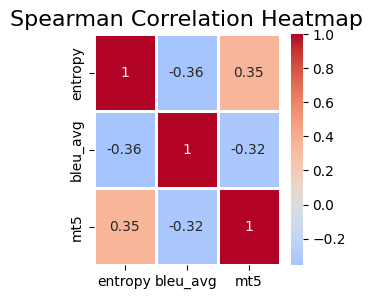

In [327]:
plt.figure(figsize=(3,3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='white', )

# Customize the plot
plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.show()

In [328]:
df_eval_lang_entropy_melted_f1_bleu["token_f1_avg_log"] = df_eval_lang_entropy_melted_f1_bleu["f1_token_avg"].apply(np.log)
df_eval_lang_entropy_melted_f1_bleu["bleu_avg_log"] = df_eval_lang_entropy_melted_f1_bleu["bleu_avg"].apply(np.log)

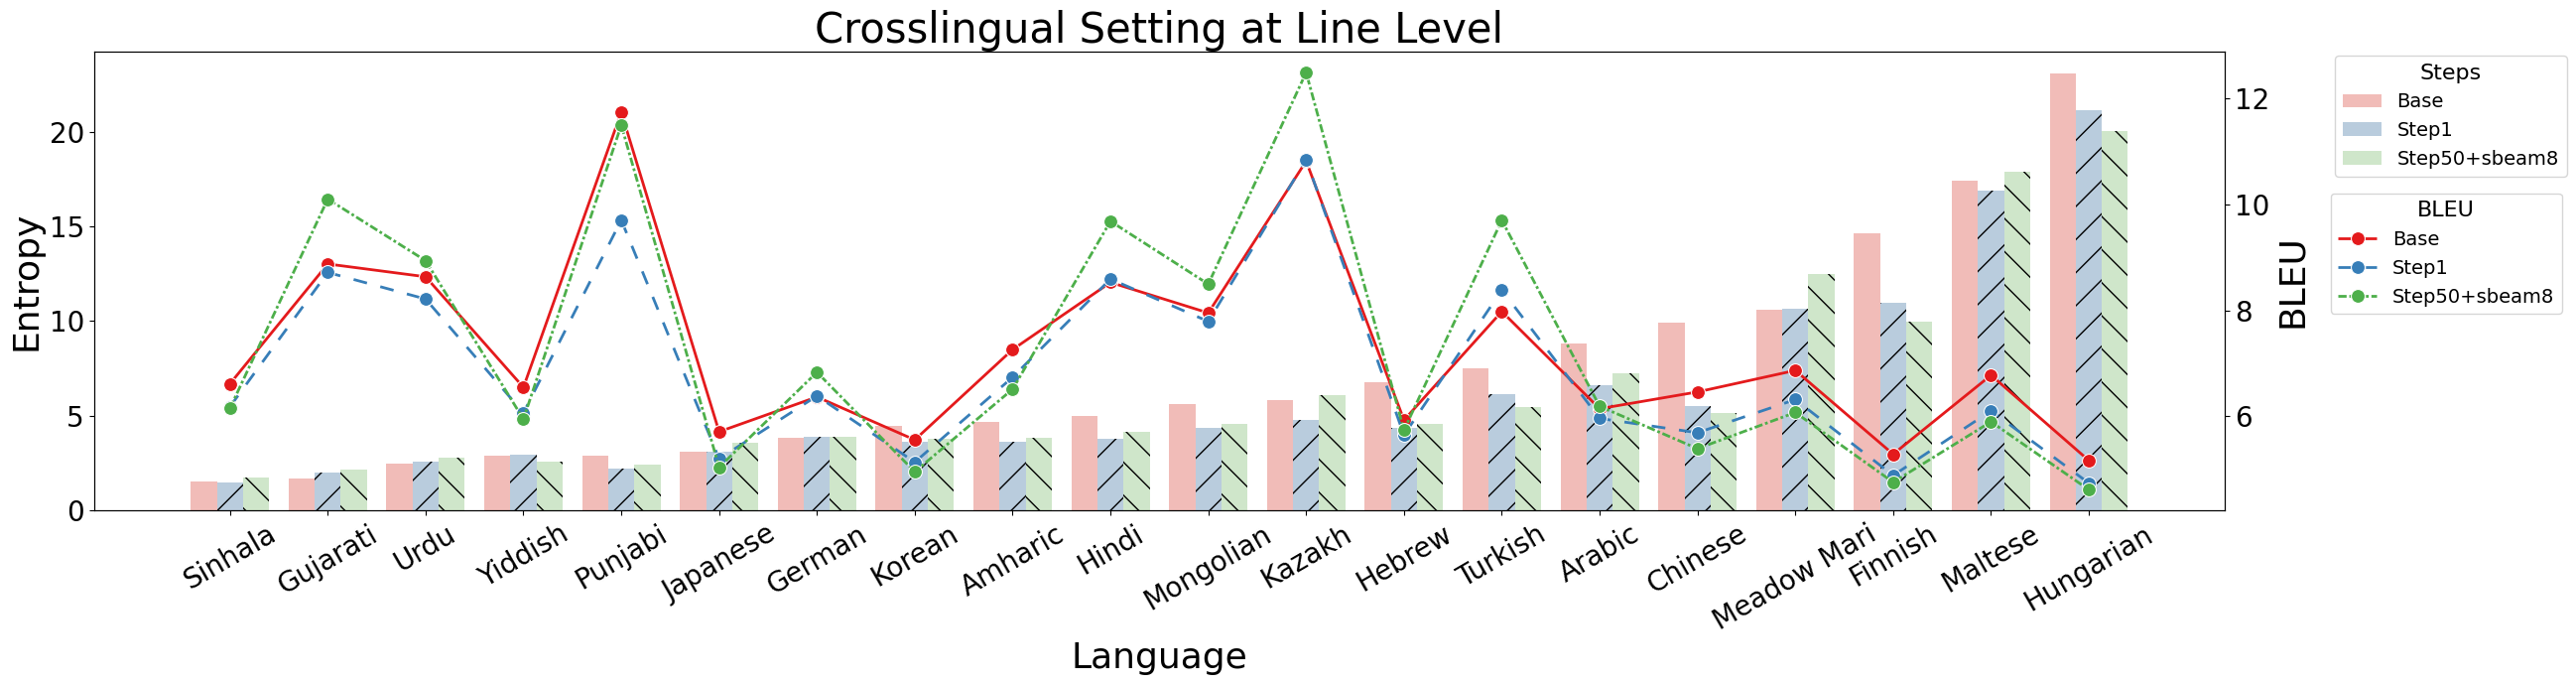

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_eval_lang_entropy_melted contains columns: 'language', 'entropy', 'step', and 'f1_score'

# Create the figure and the first axis (for entropy)
fig, ax1 = plt.subplots(figsize=(26, 7))

# Plot the barplot for entropy on the first axis
p = sns.barplot(x='language', y='entropy', data=df_eval_lang_entropy_melted_f1_bleu, hue="step", palette="Pastel1", ax=ax1)

# Add hatches to the bars
hatches = '/'
step_with_hatch = "Step1"
for patch, (step) in zip(p.patches, df_eval_lang_entropy_melted_f1_bleu['step']):
    if step == step_with_hatch:
        patch.set_hatch(hatches)
    if step == "Step50+sbeam8":
        patch.set_hatch('\\')

# Customize the first y-axis (for entropy)
ax1.set_ylabel('Entropy', fontsize=26)
ax1.set_xlabel('Language', fontsize=26)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
plt.xticks(rotation=30)

# Create a second y-axis (for F1 score)
ax2 = ax1.twinx()  # This creates the second y-axis sharing the same x-axis

dashes = [(1, 0), (5, 5), (3, 1, 1, 1)]  # solid, dashed, dotted

# Plot the line plot for F1 score on the second y-axis
sns.lineplot(x='language', y='bleu_avg', data=df_eval_lang_entropy_melted_f1_bleu, hue="step", 
             marker="o", linewidth=2, markersize=10, palette="Set1", ax=ax2,  style="step",
             dashes=dashes)


# sns.lineplot(x='language', y='mt5', data=df_eval_lang_entropy_melted_f1_bleu,
#              marker="o", linewidth=2, markersize=10, palette="Set2", ax=ax1,)

# Customi

# Customize the second y-axis (for F1 score)
ax2.set_ylabel('BLEU', fontsize=26)
ax2.tick_params(axis='y', labelsize=20)

# Add the title
plt.title('Crosslingual Setting at Line Level', fontsize=30)

# Add the legend for the steps (can be adjusted for both y-axes)
ax1.legend(title="Steps", fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.2)
ax2.legend(title="BLEU", fontsize=14, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.16, 0.7), borderaxespad=0.2)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../plots/inversion/multi_eval_langs_entropy_line_level_bleu_score_mt5.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


# check whether the eval language is in the training data

In [ ]:
df_mult_base["eval_lang_in_training"]= df_mult_base.apply(lambda row: filter_lang(row), axis=1)
df_mult_step1["eval_lang_in_training"]= df_mult_step1.apply(lambda row: filter_lang(row), axis=1)
df_mult_step50["eval_lang_in_training"]= df_mult_step50.apply(lambda row: filter_lang(row), axis=1)

In [ ]:
len(df_mult_base), len(df_mult_step1),len(df_mult_step50),

In [ ]:
df_mult_base_crosslingual = df_mult_base[df_mult_base["eval_lang_in_training"]==False]
df_mult_step1_crosslingual = df_mult_step1[df_mult_step1["eval_lang_in_training"]==False]
df_mult_step50_crosslingual = df_mult_step50[df_mult_step50["eval_lang_in_training"]==False]

In [ ]:
df_mult_base_crosslingual

# Predicted languages and their distributions from all the steps

In [ ]:
from collections import defaultdict
lang2dist_base=defaultdict(list)
lang2dist_step1 = defaultdict(list)
lang2dist_step50= defaultdict(list)

for pred_langs, pred_lang, training_langs in zip(df_mult_base_crosslingual["pred_langs"],df_mult_base_crosslingual["eval_lang"], df_mult_base_crosslingual["training_langs"]) :
    for k, v in pred_langs.items():
        # get crosslingual prediction language distribution not counting the training data and
        if k!=pred_lang and k not in training_langs:
            # if k=="mar":
                # print(training_langs, pred_lang, pred_langs)
            lang2dist_base[k].append(v)b
            

for pred_langs, pred_lang, training_langs in zip(df_mult_step1_crosslingual["pred_langs"],df_mult_step1_crosslingual["eval_lang"], df_mult_step1_crosslingual["training_langs"]) :
    for k, v in pred_langs.items():
        # get crosslingual prediction language distribution not counting the training data and
        if k!=pred_lang and k not in training_langs:
            # if k=="mar":
                # print(training_langs, pred_lang, pred_langs)
            lang2dist_step1[k].append(v)

for pred_langs, pred_lang, training_langs in zip(df_mult_step50_crosslingual["pred_langs"],df_mult_step50_crosslingual["eval_lang"], df_mult_step50_crosslingual["training_langs"]) :
    for k, v in pred_langs.items():
        # get crosslingual prediction language distribution not counting the training data and
        if k!=pred_lang and k not in training_langs:
            # if k=="mar":
                # print(training_langs, pred_lang, pred_langs)
            lang2dist_step50[k].append(v)

In [ ]:
lang2dist_base_avg= {k: np.mean(v) for k,v in lang2dist_base.items()}
lang2dist_step1_avg= {k: np.mean(v) for k,v in lang2dist_step1.items()}
lang2dist_step50_avg= {k: np.mean(v) for k,v in lang2dist_step50.items()}

In [ ]:
len(lang2dist_base_avg), len(lang2dist_step1_avg), len(lang2dist_step50_avg)

In [ ]:
df_lang2dist_base = pd.DataFrame.from_dict(lang2dist_base_avg, orient="index").rename(columns={0:"Base"})
df_lang2dist_step1 = pd.DataFrame.from_dict(lang2dist_step1_avg, orient="index").rename(columns={0:"Step1"})
df_lang2dist_step50= pd.DataFrame.from_dict(lang2dist_step50_avg, orient="index").rename(columns={0:"Step50+sbeam8"})

In [ ]:
df_ = df_lang2dist_base.join(df_lang2dist_step1)

In [ ]:
df_

In [ ]:
df_ = df_.join(df_lang2dist_step50)

In [ ]:
len(df_[df_>0.01].dropna())

In [ ]:
lang2percent = {'zho':1.67, 'ara':1.66 , 'eng':5.67, 'mar':0.93, 'rus':3.71, 'tur':1.93, 'ben':0.91, 'fas':1.67, 'deu':3.05, 'jpn':1.92,
       'pol':2.15, 'spa':3.09, 'fra':2.89, 'swe':1.61, 'kor':1.14, 'ces':1.72, 'bul':1.29, 'ita':2.43, 'slk':1.19, 'aze':0.82,
       'ukr':1.51, 'fin':1.35, 'nld':1.98, 'tgl':0.52, 'mkd':0.62, 'epo':0.4}

In [ ]:
df_= df_[df_>0.01].dropna().sort_values(by="Base", ascending=False)

In [ ]:
df_["lang"]=df_.index
df_["mt5"]= df_["lang"].apply(lambda x: lang2percent[x])

In [ ]:
df_.to_csv("../datasets/inversion_language_confusion/multi_langdist_line_level.csv" )

In [ ]:
df_

In [ ]:
lang2probs = dict()

for train_lang, eval_lang, pred_langs in zip(df_mult_base["training_langs"], df_mult_base["eval_lang"], df_mult_base["pred_langs"]):
    if eval_lang=="deu":
        print(train_lang, eval_lang, pred_langs)

In [ ]:
df_

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your dataframe as 'df' with the 'Base', 'Step1', 'Step50+sbeam8', and 'mt5' columns
# Example correlation calculation
correlation = df_[['Base', 'Step1', 'Step50+sbeam8', 'mt5']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(3,3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Steps and mt5')
plt.show()


In [ ]:
data_dir = "../datasets/inversion_language_confusion/langdist_data_all_langs"

lang_dist = defaultdict(list)
for filename in tqdm(os.listdir(data_dir)):
    if filename.endswith(".csv"):
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        df["pred_langs"]= df["pred_langs"].apply(literal_eval)
        for d in df["pred_langs"].tolist():
            for lang, dist in d.items():
                lang_dist[lang].append(dist)
        
    
    

In [ ]:
lang_dist["tha"]

In [ ]:
langs= list(set(lang_dist.keys()))

In [ ]:
import json
with open("../datasets/inversion_language_confusion/langs.json", "w") as f:
    json.dump(langs,f)

with open("../datasets/inversion_language_confusion/lang_dist.json", "w") as f:
    json.dump(lang_dist, f)

In [ ]:
lang_dist_filter = {lang:[x for x in dist if x>=0.01] for lang, dist in lang_dist.items()}

In [ ]:
lang_dist_filter["tha"]

In [ ]:
lang_dist_filter

In [ ]:
with open("../src/languageConfusion/lang2file.yaml") as f:
    lang2file = yaml.safe_load(f)

In [ ]:
langs = [x.split("_")[0] for x in list(lang2file.keys())]

In [ ]:
# languages in the inversion results

In [ ]:
langs = ['deu',
 'ydd',
 'heb',
 'arb',
 'amh',
 'mlt',
 'hin',
 'urd',
 'guj',
 'sin',
 'pan',
 'tur',
 'kaz',
 'cmn',
 'jpn',
 'kor',
 'mon',
 'hun',
 'mhr',
 'fin']

In [ ]:
len(langs)

In [ ]:
df = pd.read_csv("../datasets/inversion_language_confusion/line_level/mono/train_data.csv")

In [ ]:
df_wals = pd.read_csv("../datasets/data_for_graph/WALS/wals_lang2features.csv")

In [ ]:
df_gb = pd.read_csv("../datasets/data_for_graph/Grambank/grambank_lang2features.csv")

In [ ]:
df_langs = pd.read_csv("../datasets/languages/languoid.csv")

In [ ]:
glottocode2iso3 = dict(zip(df_langs["id"], df_langs["iso639P3code"]))

In [ ]:
glottocode2iso3["stan1295"]

In [ ]:
glottocode2iso3_langs = {idx:code for idx,code in glottocode2iso3.items() if code in langs}

In [ ]:
len(glottocode2iso3_langs)

In [ ]:
glottocode2iso3_langs

In [ ]:
df_langs[df_langs["iso639P3code"]=="deu"]

In [ ]:
"deu" in df_langs["iso639P3code"].tolist()

# Grambank features Selection

In [ ]:
df_gb["iso639P3code"]=df_gb["Lang_ID"].map(glottocode2iso3)

In [ ]:
df_gb_langs = df_gb[df_gb["iso639P3code"].isin(langs)]

In [ ]:
df_gb_langs

In [ ]:
"deu" in df_gb["iso639P3code"].tolist()

In [ ]:
len(langs)

In [ ]:
langs

In [ ]:
df_gb_langs.replace({-1:np.nan}, inplace=True)

In [ ]:
len(df_gb_langs.dropna(axis=1).columns) # 93 features exist in all languages.

In [ ]:
df_gb_langs.dropna(axis=1).to_csv("../datasets/inversion_language_confusion/gb_features_nona.csv", index=False)

### threshold 0.75 for languages coverage by features

In [ ]:
gb_features = [x for x in df_gb.columns if x.startswith("GB")]

In [ ]:
tot_feats= len(gb_features)
print(f"total features {tot_feats}")
perc = 0.75
cols_gb=[]
for col in gb_features:
    no_data = df_gb_langs[col].to_list().count(-1)
    if (tot_feats-no_data)>=(perc*tot_feats):
        # print(col, no_data)
        cols_gb.append(col)
    

In [ ]:
len(cols_gb)

In [ ]:
df_gb_langs

In [ ]:
df_gb_langs.to_csv("../datasets/inversion_language_confusion/gb_features.csv",index=False)

# WALS features

In [ ]:
df_wals["iso639P3code"]=df_wals["Glottocode"].map(glottocode2iso3)

In [ ]:
"deu" in df_wals["iso639P3code"].tolist()

In [ ]:
df_wals[df_wals["iso639P3code"]=="deu"]

In [ ]:
df_wals

In [ ]:
df_wals.index = df_wals["iso639P3code"]

In [ ]:
df_wals=df_wals[df_wals["iso639P3code"].isin(langs)]

In [ ]:
df_wals

In [ ]:
features = df_wals.columns.tolist()

In [ ]:
features.remove("Glottocode")
features.remove("iso639P3code")

In [ ]:
features

In [ ]:
tot_feats= len(features)
print(f"total features {tot_feats}")
perc = 0.25
for i, row in df_wals.iterrows():
    no_data = row[features].to_list().count(-1)
    if (tot_feats-no_data)<(perc*tot_feats):
        print(i, no_data)
    else:
        print(i, no_data)

# The features that are present in most of the relevant languages
- threshold =0.75

In [ ]:
print(len(df_wals))
langs_exist = len(df_wals)
cols = []
for col in features:
    no_data = df_wals[col].to_list().count(-1)
    if (langs_exist - no_data) >= (0.75*langs_exist):
    
        print(col, langs_exist - no_data)
        cols.append(col)

In [ ]:
df_wals[cols+["Glottocode"]].to_csv("../datasets/inversion_language_confusion/wals_features.csv")

In [ ]:
df_wals[cols].to_csv("../datasets/inversion_language_confusion/wals_features.csv")

In [ ]:
df_wals_cols = df_wals[cols]

In [ ]:
df_wals_cols = df_wals_cols.drop(columns=["Family", "Genus"])

In [ ]:
df = df_wals_cols.T

In [ ]:
df 

In [ ]:
plt.figure(figsize=(20, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.T, 
            cmap=cmap, 
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Standardized Feature Value'})

# Customize the plot
plt.xlabel('Feature Index')
plt.ylabel('Language')
plt.title('Language Feature Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Print feature statistics
print("\nFeature Statistics:")
print(df.T.describe().T[['mean', 'std', 'min', 'max']])

# Clustering languages based on WALS features

In [ ]:
df_wals.index= df_wals["iso639P3code"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 3  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df.T)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.T)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df.T.index)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Language Clusters based on Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add language labels to the points
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for lang, cluster in zip(df.T.index, clusters):
    print(f"{lang}: Cluster {cluster}")

# Print feature importance
print("\nFeature Importance (based on KMeans cluster centers):")
feature_importance = pd.DataFrame(kmeans.cluster_centers_.T, index=df.T.columns, columns=[f'Cluster {i}' for i in range(n_clusters)])
print(feature_importance)


# Clustering Languages based on their Grambank features

In [ ]:
df_gb_langs.index=df_gb_langs["iso639P3code"]

In [ ]:
df_gb_langs = df_gb_langs.drop(columns=["iso639P3code", "Lang_ID"])

In [ ]:
len(df_gb_langs)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 6  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_gb_langs)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_gb_langs)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df_gb_langs.index)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Language Clusters based on Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add language labels to the points
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for lang, cluster in zip(df_gb_langs.index, clusters):
    print(f"{lang}: Cluster {cluster}")

# Print feature importance
print("\nFeature Importance (based on KMeans cluster centers):")
feature_importance = pd.DataFrame(kmeans.cluster_centers_.T, index=df_gb_langs.columns, columns=[f'Cluster {i}' for i in range(n_clusters)])
print(feature_importance)
